Jamboree Education - Linear Regression - (Asia's leading and largest test prep institute)

**1.Define Problem Statement and perform Exploratory Data Analysis**

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective

In [1]:
# importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read file
data = pd.read_csv('/content/drive/MyDrive/[01]DataScience/Data sets/Python files/CSV files/ML dataset/Jamboree_Admission.csv')

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Column Profiling**


- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)

In [4]:
#checking data size
data.shape

(500, 9)

In [5]:
#checking null values
data.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [6]:
#checking duplicate records
data.duplicated().sum()

np.int64(0)

In [7]:
#checking data types
data.dtypes

,0
Serial No.,int64
GRE Score,int64
TOEFL Score,int64
University Rating,int64
SOP,float64
LOR,float64
CGPA,float64
Research,int64
Chance of Admit,float64


In [8]:
#checking statistical summary
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [12]:
data.drop(columns='Serial No.', axis=1, inplace=True)

In [16]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [19]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [21]:
data.rename(columns={'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'},
            inplace=True)

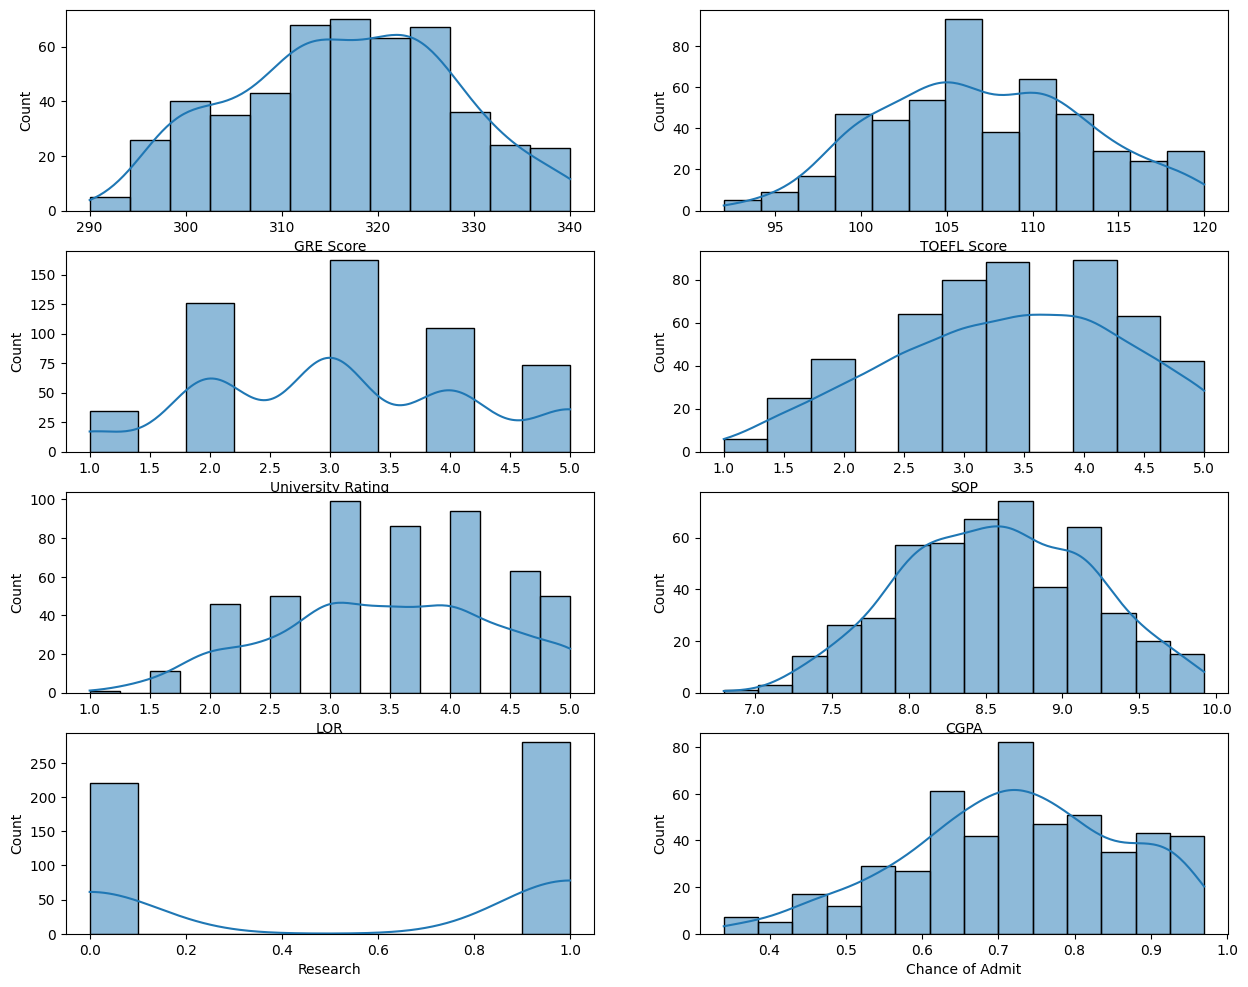

In [29]:
# univariate analysis
# histplot
cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']
fig, axis = plt.subplots(nrows=4,ncols=2,figsize=(15,12))
index = 0
for row in range(4):
  for col in range(2):
    sns.histplot(data[cols[index]], ax=axis[row,col], kde=True)
    index += 1
plt.show()

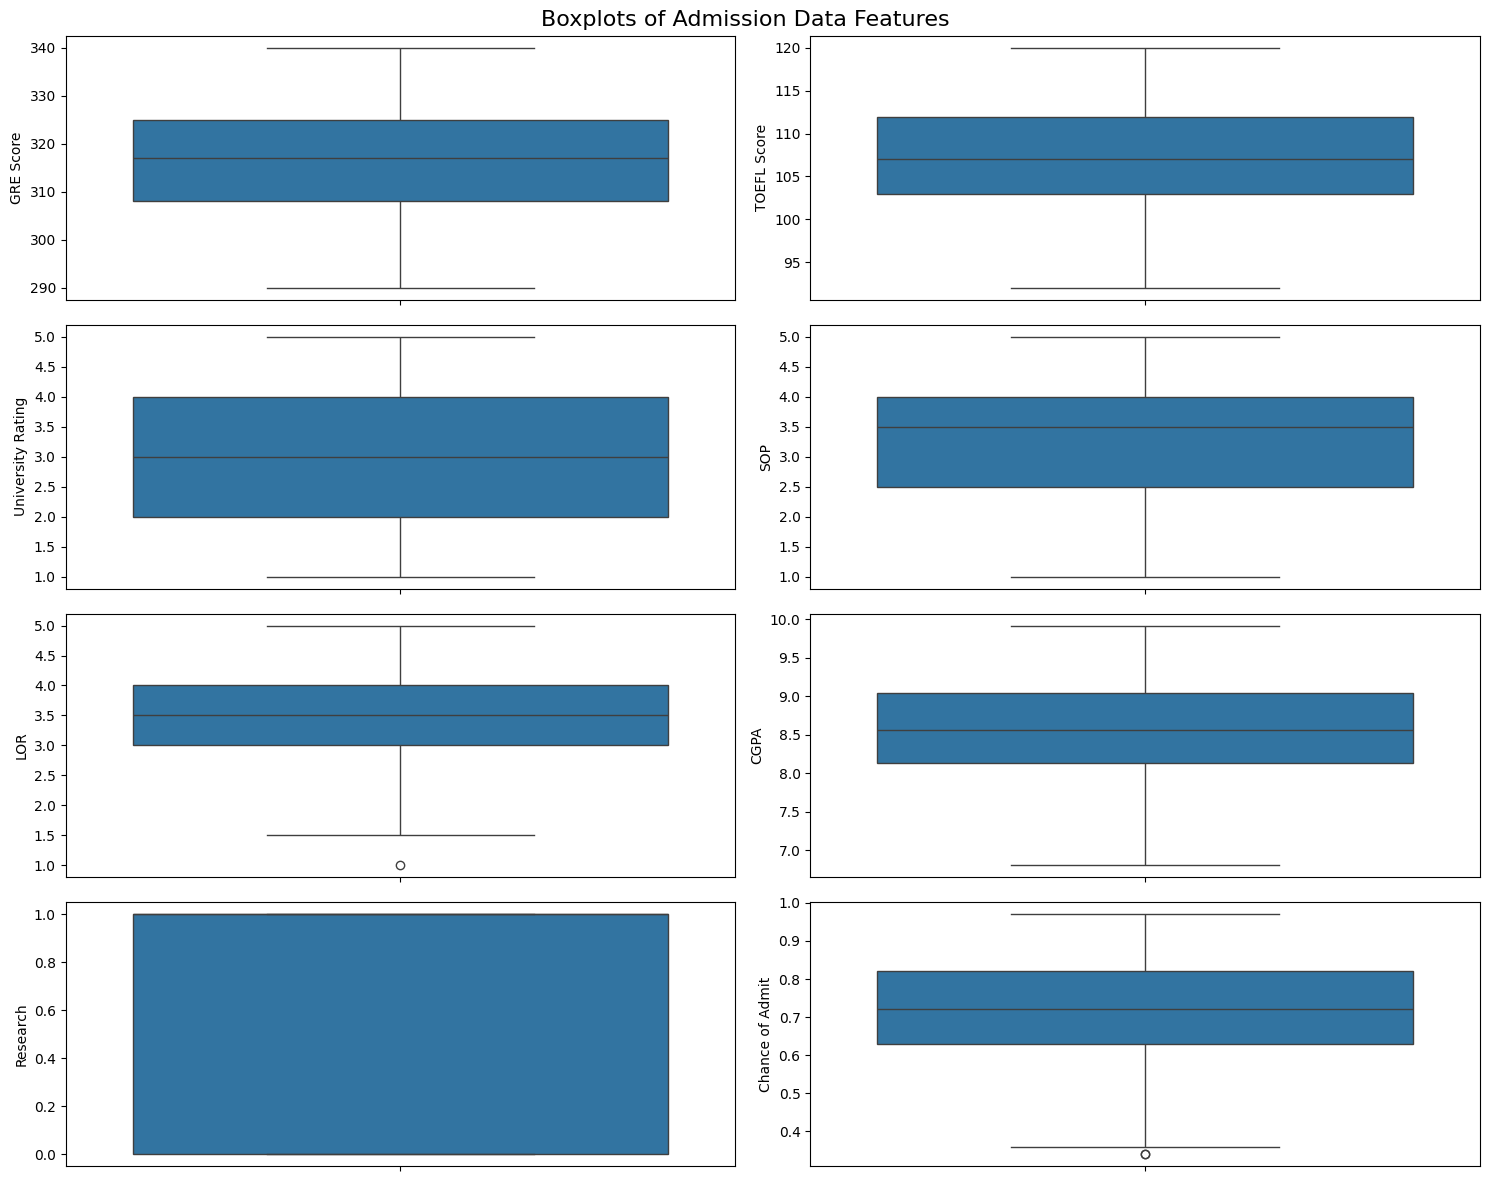

In [34]:
# boxplot
cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']
fig, axis = plt.subplots(nrows=4,ncols=2,figsize=(15,12))
index = 0
for row in range(4):
  for col in range(2):
    sns.boxplot(data[cols[index]], ax=axis[row,col])
    index += 1
plt.suptitle('Boxplots of Admission Data Features', fontsize=16)
plt.tight_layout()
plt.show()

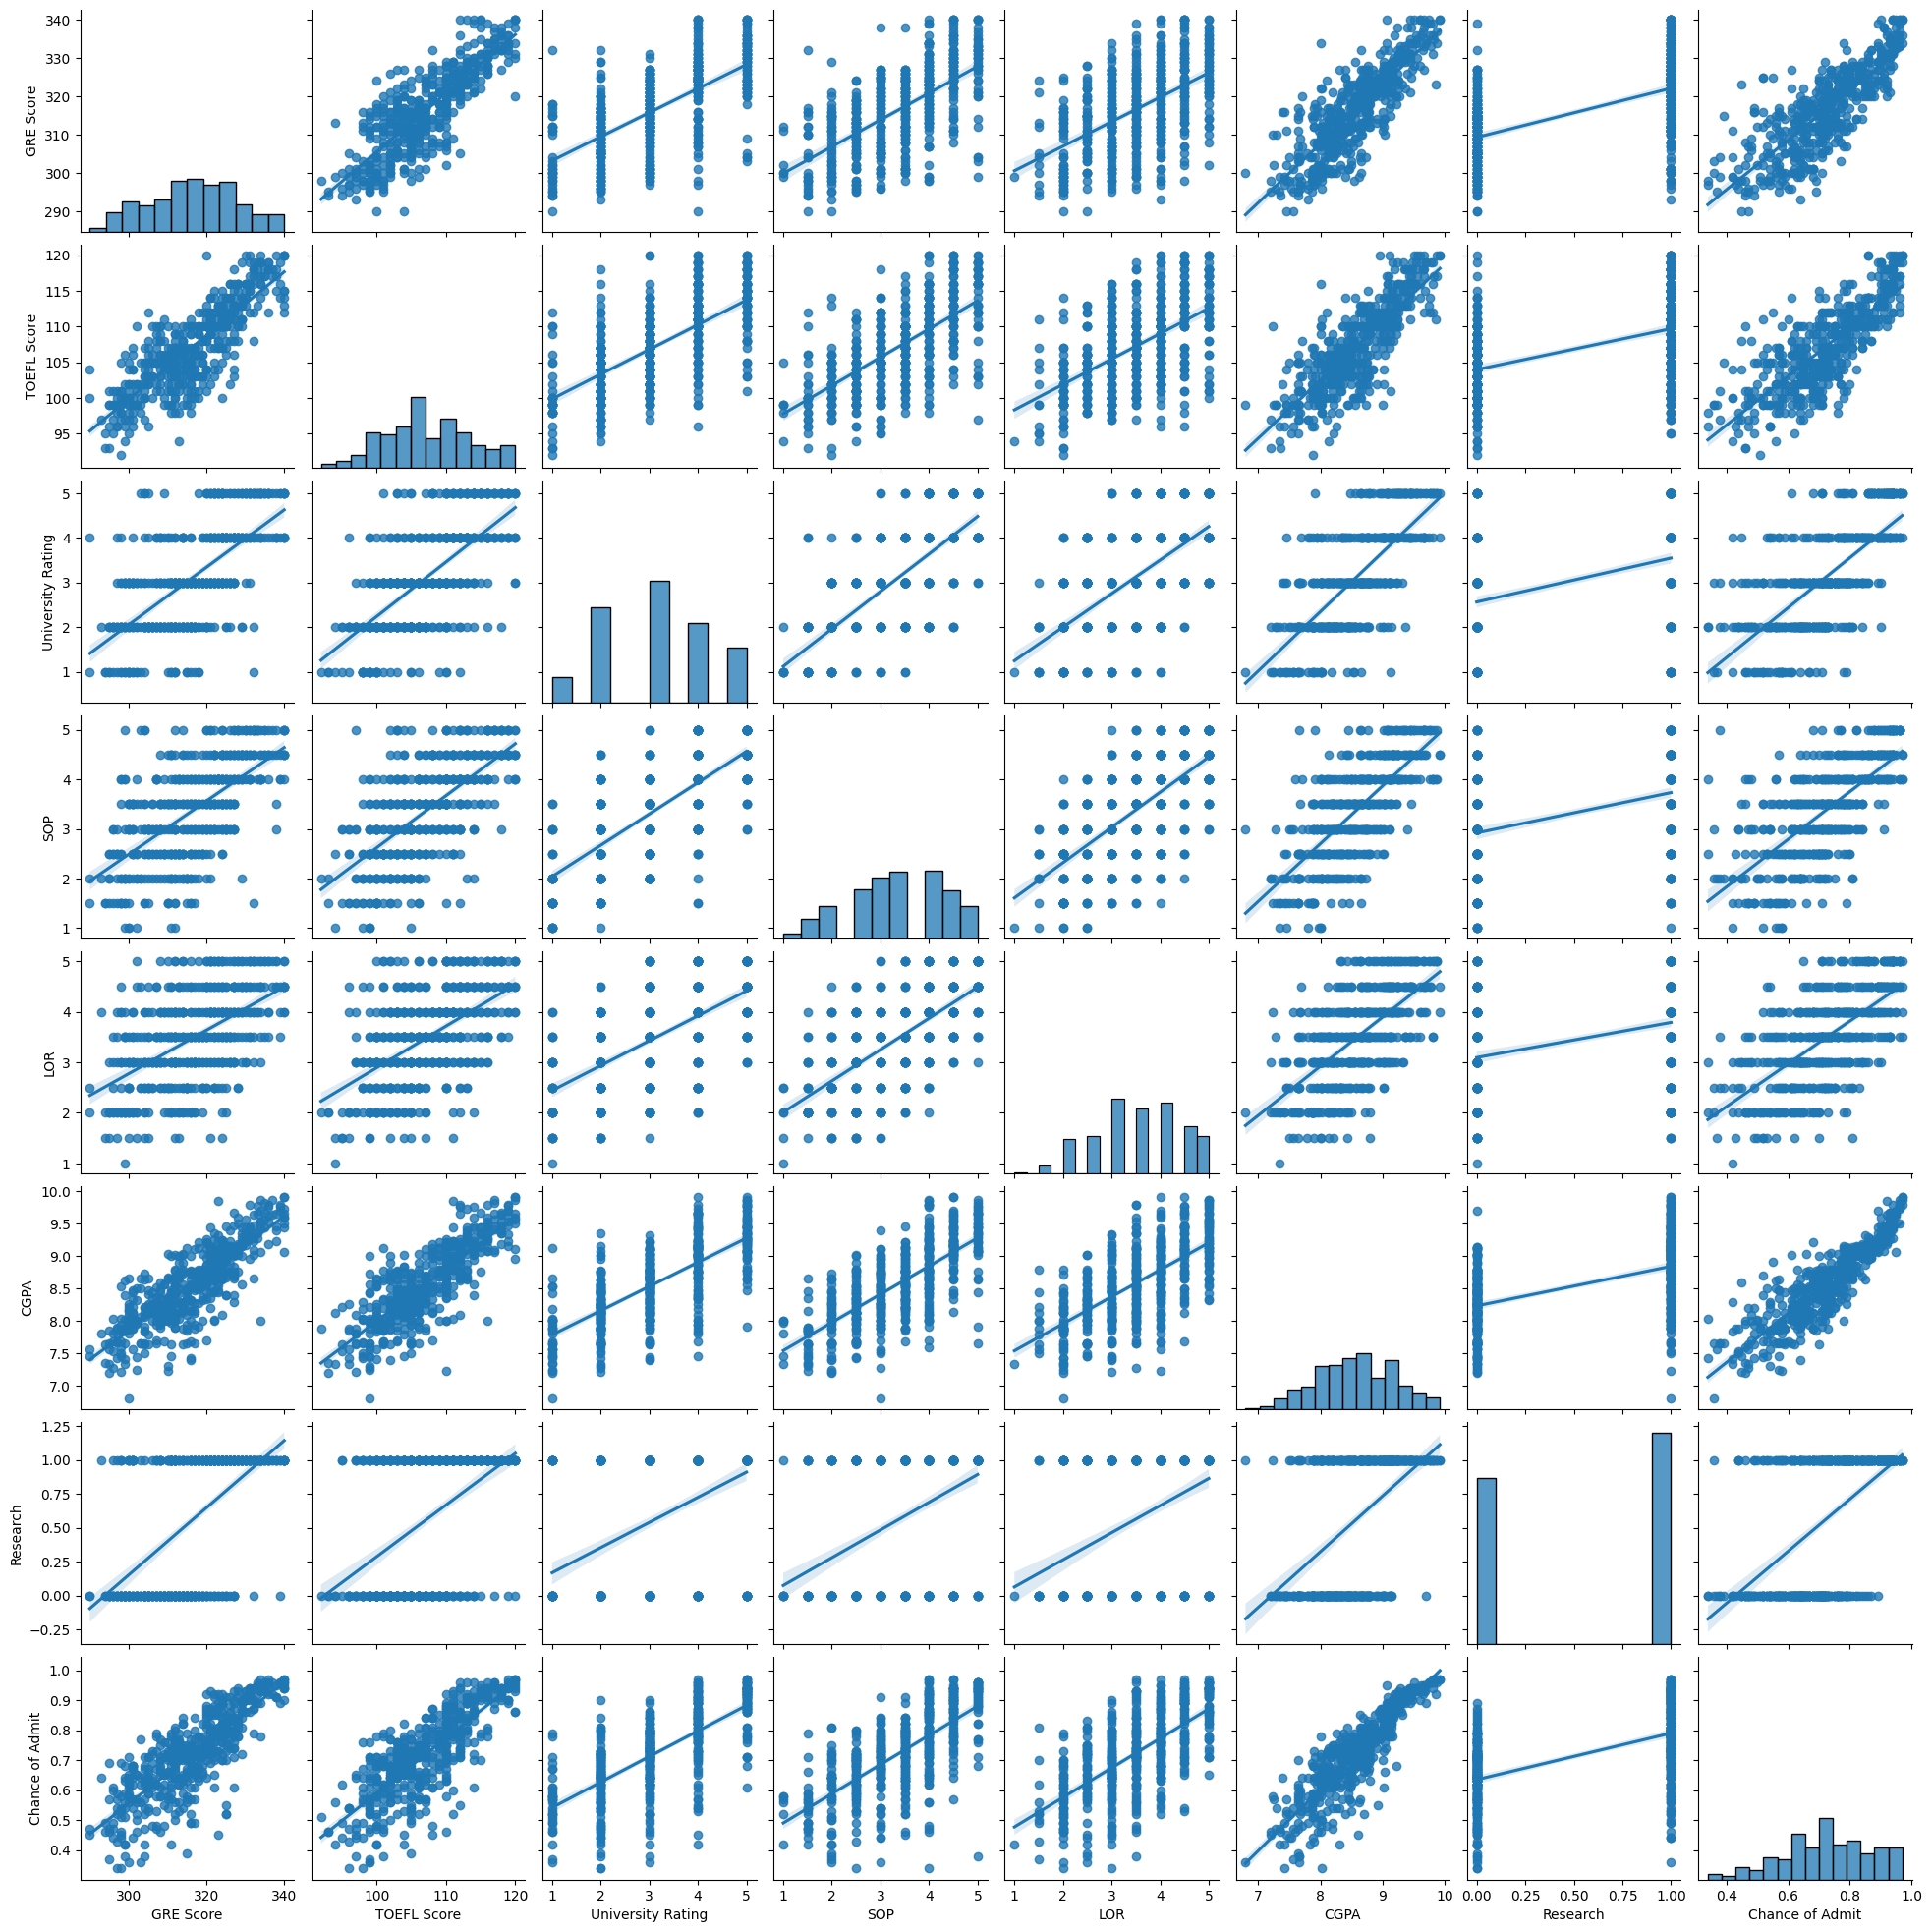

In [30]:
#pair plot
sns.pairplot(data=data, kind='reg')

<Axes: >

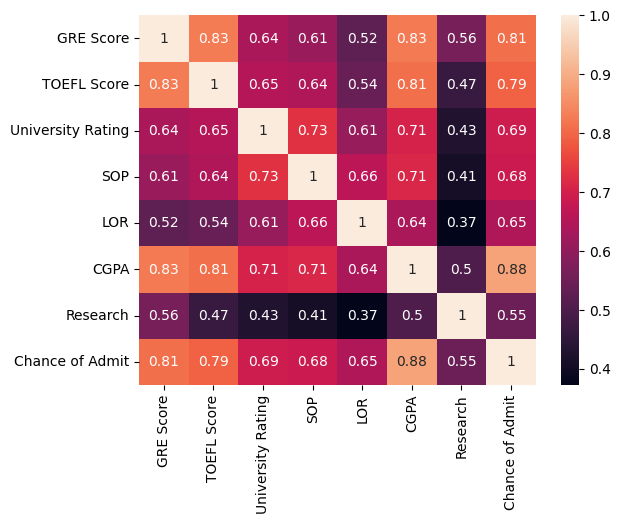

In [31]:
#Heat map
sns.heatmap(data=data.corr(), annot=True)

In [32]:
# Inferences based on EDA
'''
- No duplicates, no missing values, no major outliers
- GRE, TOEFEL, CGPA are highly correlated with the chance of admission
- LOR, SOP are not great factor in terms of admission, but slightly correlated -> kind of basic requirement for the admission irrespective of the performance of students
- Research has lesser impact compared to the other other features.
'''

'\n- GRE, TOEFEL, CGPA are highly correlated with the chance of admission \n- LOR, SOP are not great factor in terms of admission, but slightly correlated -> kind of basic requirement for the admission irrespective of the performance of students\n- Research has lesser impact compared to the other other features.\n'

In [35]:
# Data Preprocessing (model creation)
from sklearn.model_selection import train_test_split
X = data.drop(['Chance of Admit'], axis=1)
y = data['Chance of Admit']

In [36]:
# Splitting data set for traing and testing 80/20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=24)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 7), (100, 7), (400,), (100,))

In [43]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
211,328,110,4,5.0,4.0,9.14,1
84,340,115,5,4.5,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0
118,296,99,2,3.0,3.5,7.28,0
126,323,113,3,4.0,3.0,9.32,1


In [44]:
# standardizing our training & testing data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [46]:
X_train_std

array([[ 1.02896501,  0.46243464,  0.79167159, ...,  0.59699789,
         0.94538701,  0.90911166],
       [ 2.08139034,  1.28894873,  1.67869858, ...,  1.13972324,
         1.45841978,  0.90911166],
       [-0.37426876, -0.6946851 , -0.0953554 , ...,  0.59699789,
         0.34960701, -1.09997489],
       ...,
       [ 0.50275235,  1.12364591,  1.67869858, ...,  0.59699789,
         0.61439812,  0.90911166],
       [-0.81277931, -0.36407946, -0.98238239, ...,  0.05427254,
        -0.7757552 , -1.09997489],
       [-0.63737509,  0.62773746, -0.98238239, ...,  0.59699789,
        -0.89160131, -1.09997489]])

In [47]:
X_test_std

array([[ 0.41505024,  0.79304028, -0.0953554 , -0.38175787,  1.13972324,
         0.63094756,  0.90911166],
       [-0.02346031,  0.46243464, -0.0953554 ,  0.65002017,  1.13972324,
         0.34960701,  0.90911166],
       [ 0.67815657,  0.9583431 ,  0.79167159,  1.16590918,  0.59699789,
         0.36615645, -1.09997489],
       [ 0.9412629 , -0.52938228,  1.67869858, -0.38175787,  0.05427254,
         0.44890368,  0.90911166],
       [-1.51439619, -2.18241047, -1.86940938, -2.44531395, -2.65935424,
        -2.03351297, -1.09997489],
       [-1.16358775, -1.19059356, -0.98238239, -0.38175787,  0.05427254,
        -0.84195298,  0.90911166],
       [ 1.99368823,  1.12364591,  1.67869858,  0.65002017,  1.13972324,
         1.97145255,  0.90911166],
       [ 1.64287979,  1.78485719,  1.67869858,  1.16590918,  0.05427254,
         1.44187033,  0.90911166],
       [ 1.90598612,  1.78485719,  0.79167159, -0.38175787,  1.13972324,
         1.37567256,  0.90911166],
       [ 0.50275235,  0.4624

In [48]:
# lets convert these arrays into datafrome
X_train = pd.DataFrame(X_train_std, columns=X_train.columns)
X_test = pd.DataFrame(X_test_std, columns=X_test.columns)

In [51]:
X_train.head() #standardized result

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.028965,0.462435,0.791672,1.681798,0.596998,0.945387,0.909112
1,2.081390,1.288949,1.678699,1.165909,1.139723,1.458420,0.909112
2,-0.374269,-0.694685,-0.095355,0.134131,0.596998,0.349607,-1.099975
3,-1.777503,-1.355896,-0.982382,-0.381758,0.054273,-2.132810,-1.099975
4,0.590454,0.958343,-0.095355,0.650020,-0.488453,1.243277,0.909112


In [52]:
X_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.415050,0.793040,-0.095355,-0.381758,1.139723,0.630948,0.909112
1,-0.023460,0.462435,-0.095355,0.650020,1.139723,0.349607,0.909112
2,0.678157,0.958343,0.791672,1.165909,0.596998,0.366156,-1.099975
3,0.941263,-0.529382,1.678699,-0.381758,0.054273,0.448904,0.909112
4,-1.514396,-2.182410,-1.869409,-2.445314,-2.659354,-2.033513,-1.099975


In [53]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge # regression models
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  # metrics used to evaluate model performance
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)
y_pred = lr.predict(X_test)

rsquare_error = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
adj_r2 = 1 - (1 - r2_score(y_test,y_pred)) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)

print('R2 score :',rsquare_error )
print('MAE :',mae )
print('RMSE :', rmse)
print('ADJUSTED R2 :',adj_r2 )

R2 score : 0.8174673275904598
MAE : 0.04310970202831316
RMSE : 0.054501608837379166
ADJUSTED R2 : 0.8142078155831466


In [55]:
lr.coef_

array([0.02184042, 0.01249718, 0.00931224, 0.00334534, 0.01564483,
       0.07426036, 0.01153387])

In [56]:
lr.intercept_

np.float64(0.71765)

In [57]:
# lasso linear regression model
lr1 = Lasso(alpha=0.1)
lr1.fit(X_train,y_train)
lr1.score(X_train,y_train)
y_pred1 = lr1.predict(X_test)
r2_score(y_test,y_pred1)

rsquare_error = r2_score(y_test,y_pred1)
mae = mean_absolute_error(y_test,y_pred1)
rmse = np.sqrt(mean_squared_error(y_test,y_pred1))
adj_r2 = 1 - (1 - r2_score(y_test,y_pred1)) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)

print('R2 score :',rsquare_error )
print('MAE :',mae )
print('RMSE :', rmse)
print('ADJUSTED R2 :',adj_r2 )

R2 score : 0.3082894143289955
MAE : 0.08599208385284628
RMSE : 0.10609654154473025
ADJUSTED R2 : 0.2959374395848704


In [59]:
lr1.coef_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02720286, 0.        ])

In [60]:
lr1.intercept_

np.float64(0.7176500000000001)

In [61]:
# Ridge Linear Regression model
lr2 = Ridge(alpha=0.1)
lr2.fit(X_train,y_train)
print('train_score :', lr2.score(X_train, y_train))
y_pred2 = lr2.predict(X_test)
r2_score(y_test, y_pred2)

rsquare_error = r2_score(y_test, y_pred2)
mae = mean_absolute_error(y_test, y_pred2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred2))
adj_r2 = 1 - (1 - r2_score(y_test,y_pred2)) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)

print('R2 score :',rsquare_error )
print('MAE :',mae )
print('RMSE :', rmse)
print('ADJUSTED R2 :',adj_r2 )

train_score : 0.8207522908847482
R2 score : 0.8174987918180023
MAE : 0.04310669645096011
RMSE : 0.05449691125391273
ADJUSTED R2 : 0.8142398416718952


In [63]:
lr2.coef_

array([0.02185952, 0.01251966, 0.00931668, 0.00336125, 0.01565117,
       0.07418781, 0.01153644])

In [64]:
lr2.intercept_

np.float64(0.71765)

In [65]:
# Inferences
'''
- CGPA is the most important feature in getting admitted
- Followed by GRE,TOEFEL score act as imp factor in geting admiited
- the model train and test performace almost similar , a perfect fit model - the performace is better in normal and ridge linear regression ,
  lasso regression doesn't perform well up to the other models , can fine tune the alpha further to check its performance further
'''

"\n- CGPA is the most important feature in getting admitted\n- Followed by GRE,TOEFEL score act as imp factor in geting admiited\n- the model train and test performace almost similar , a perfect fit model - the performace is better in normal and ridge linear regression , \n  lasso regression doesn't perform well up to the other models , can fine tune the alpha further to check its performance further\n"

In [66]:
# model using statsmodel library
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train.values,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.4
Date:                Tue, 10 Jun 2025   Prob (F-statistic):          4.81e-142
Time:                        10:08:46   Log-Likelihood:                 551.76
No. Observations:                 400   AIC:                            -1088.
Df Residuals:                     392   BIC:                            -1056.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7177      0.00

In [67]:
X_test = sm.add_constant(X_test)
sm_pred = model.predict(X_test)
r2_score(y_test, sm_pred)

0.8174673275904597

In [68]:
X_train_new=X_train.drop(columns=("University Rating"))
X_train_new=X_train_new.drop(columns=("SOP"))

In [69]:
model1 = sm.OLS(y_train.values, X_train_new).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     354.6
Date:                Tue, 10 Jun 2025   Prob (F-statistic):          2.19e-143
Time:                        10:11:58   Log-Likelihood:                 548.91
No. Observations:                 400   AIC:                            -1086.
Df Residuals:                     394   BIC:                            -1062.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7177      0.003    232.203      

In [70]:
# Assumptions test - LR
# let's use VIF to prove there is no multicollinearity among features
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X_t = pd.DataFrame(X_train, columns=X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values,i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
6,CGPA,4.97
1,GRE Score,4.51
2,TOEFL Score,3.96
4,SOP,2.86
3,University Rating,2.50
5,LOR,2.02
7,Research,1.49
0,const,1.00


In [ ]:
# clearly there is no multicollinearity among features in the dataset

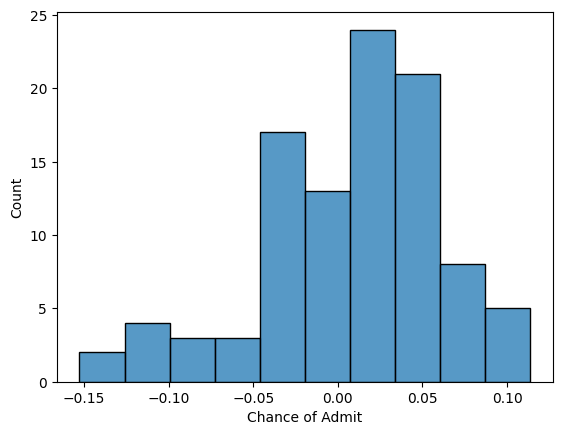

In [71]:
# residuals are normally distributed
residual = y_test - y_pred
sns.histplot(residual)
plt.show()

In [72]:
# Mean of residuals should be close to zero
residual.mean()

np.float64(0.00920186421712253)

In [ ]:
# Where errors are normally distributed and the means of error is close to zero

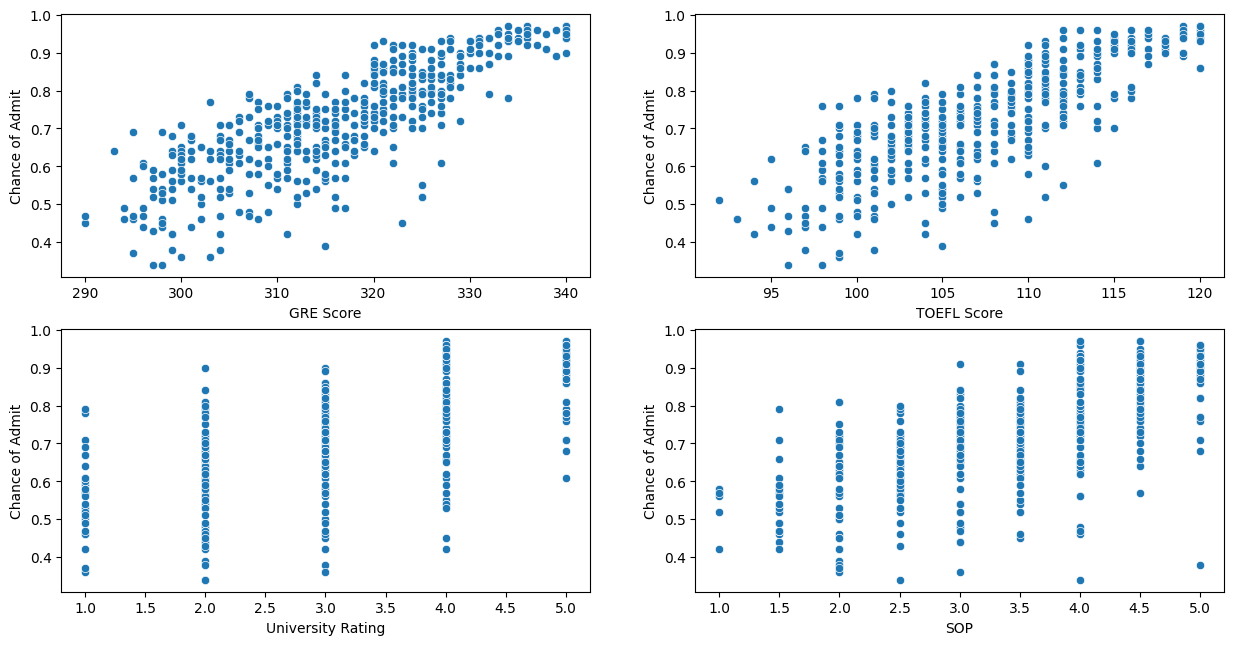

In [77]:
column_cat=["GRE Score","TOEFL Score","University Rating","SOP","CGPA"]
fig,axis=plt.subplots(nrows=2,ncols=2,figsize=(15,7.5))
index=0
for row in range(2):
  for col in range(2):
    sns.scatterplot(x=data[column_cat[index]],y=data["Chance of Admit"],ax=axis[row,col])
    index +=1
plt.show()

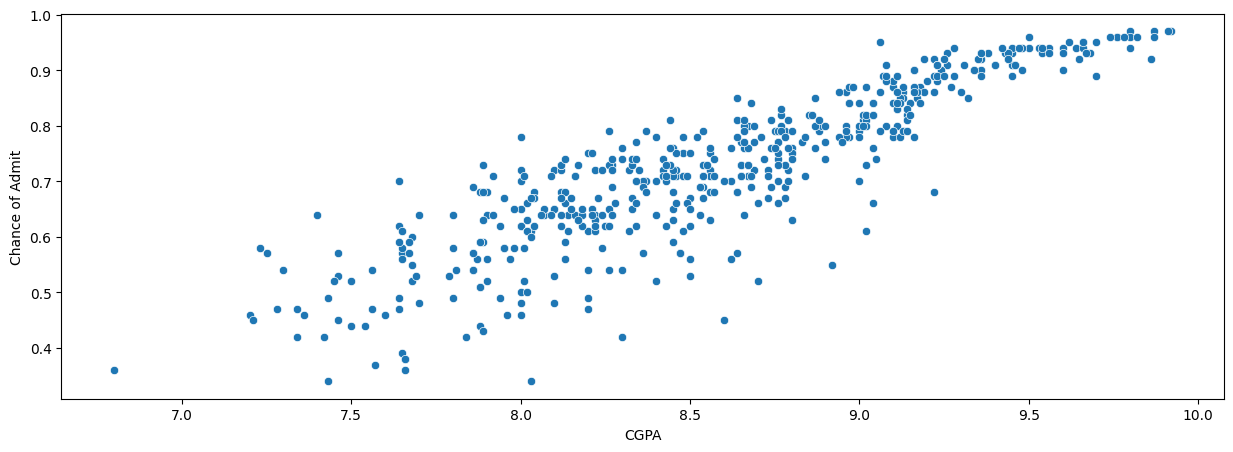

In [79]:
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
sns.scatterplot(x=data[column_cat[-1]], y=data['Chance of Admit'])
plt.show()

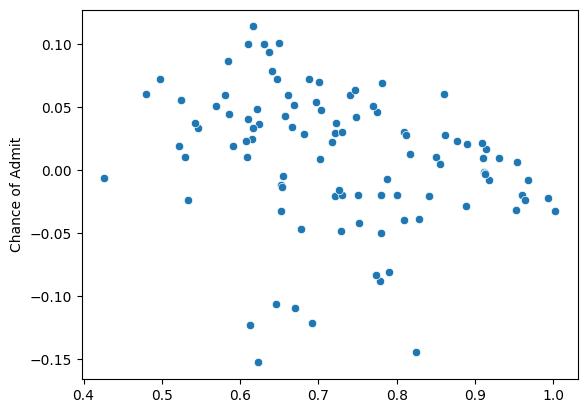

In [80]:
# Test for Homoscedasticity
sns.scatterplot(x=y_pred, y=residual)
plt.show()

In [82]:
#goldfelt quant test for homoskedascity
#null hypothesis: dataset has homoskedascity
#alternate hypothesis: dataset has heteroskedascity
alpha=0.05
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name=['F statistics','p-value']
test=sms.het_goldfeldquandt(residual,X_test)
p_value=test[1]

if p_value<alpha:
  print("Reject null hypothesis & data has heteroskedascity")
else:
  print("Fail to reject null hypothesis & data has homoskedascity")

Fail to reject null hypothesis & data has homoskedascity


In [81]:
# There is homoscedasticity within the dataset, hence the model is reliable and there are no outliers present

**SUMMARY**

- Students who wants to get admitted in high ranked university must maintain high CGPA and score higher in Toefel and GRE exam
- In terms of Model - Linear Regression and Ridge Regression has ability to predict better and has a r2 score nearly 82%
- The chance are low for students who score moderate in CGPA,GRE,TOEFEL in high ranked university , high interms of moderate rated universities
- Can add more features such as Other curricular activites which demonstrates their other skills such as leadership,Team work,Initiatives,achievements to support their chance of getting admitted in high rated universites apart from Exam scores